<a href="https://colab.research.google.com/github/as791/Devanagri-character-recognation/blob/master/Devanagri_recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/devanagari-character-dataset')

Mounted at /content/drive


In [0]:
label=pd.read_csv('./labels.csv')

In [0]:
import matplotlib.pyplot as plt
consonants=[]
for con in sorted(list(map(int,os.listdir('./consonants')))):
    my_list=[]
    for i in os.listdir('./consonants/'+str(con)):
        if i!='.BridgeSort':
            my_list.append(plt.imread('./consonants/'+ str(con) +'/' +i))
    consonants.append(my_list)

In [0]:
vowels=[]
for con in sorted(list(map(int,os.listdir('./vowels')))):
    my_list=[]
    for i in os.listdir('./vowels/'+str(con)):
        my_list.append(plt.imread('./vowels/'+ str(con) +'/' +i))
    vowels.append(my_list)
numerals=[]
for con in sorted(list(map(int,os.listdir('./numerals')))):
    my_list=[]
    for i in os.listdir('./numerals/'+str(con)):
         my_list.append(plt.imread('./numerals/'+ str(con) +'/' +i))
    numerals.append(my_list)

In [0]:
X_train_1=np.array(consonants)
X_train_2=np.array(numerals)
X_train_3=np.array(vowels)

In [0]:
Y_train_1=np.array(label.iloc[34:70,1:3])
Y_train_2=np.array(label.iloc[2:12,1:3])
Y_train_3=np.array(label.iloc[17:29,1:3])


In [0]:
Y_train_label=[]
Y_train=[]
for i in range(X_train_1.shape[0]):
    for _ in range(X_train_1.shape[1]):
        Y_train.append(i)
        Y_train_label.append(Y_train_1[i])
for i in range(X_train_2.shape[0]):
    for _ in range(X_train_2.shape[1]):
        Y_train.append(i+36)
        Y_train_label.append(Y_train_2[i])
for i in range(X_train_3.shape[0]):
    for _ in range(X_train_3.shape[1]):
        Y_train.append(i+46)
        Y_train_label.append(Y_train_3[i])

In [9]:
Y_train=np.array(Y_train)
X_train=np.array(list(X_train_1.reshape([36*205,36,36]))+list(X_train_2.reshape([10*288,36,36]))+list(X_train_3.reshape([12*221,36,36])))
X_train=X_train.reshape([12912,36,36,1])
Y_train=Y_train.reshape([12912,1])
X_train.shape,Y_train.shape

((12912, 36, 36, 1), (12912, 1))

In [0]:
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,Activation

In [0]:
Y_train=keras.utils.to_categorical(Y_train,58)

In [12]:
model=Sequential()
model.add(Conv2D(64,3,activation='relu',padding='same',input_shape=(36,36,1)))
model.add(MaxPool2D((2,2),2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(256,5,padding='same',activation='relu'))
model.add(MaxPool2D((2,2),2))
model.add(Conv2D(256,5,padding='same',activation='relu'))
model.add(Flatten())
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(58,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 36, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train,Y_train=shuffle(X_train,Y_train,random_state=2)
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

In [0]:
X_train=keras.utils.normalize(X_train,axis=1)

In [0]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

In [16]:
X_train.shape,X_val.shape,X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape

((10458, 36, 36, 1),
 (1162, 36, 36, 1),
 (1292, 36, 36, 1),
 (10458, 58),
 (1162, 58),
 (1292, 58))

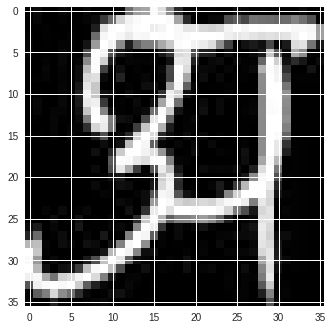

In [17]:
plt.imshow(X_test[1].reshape([36,36]))

In [0]:
import tensorflow.keras.optimizers as optimizers
adam = optimizers.Adam(lr=0.001)

In [0]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(X_train,Y_train,batch_size=400,epochs=20,validation_data =(X_val,Y_val))

Train on 10458 samples, validate on 1162 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10458/10458 [==============================] - 13s 1ms/sample - loss: 0.0870 - acc: 0.9828 - val_loss: 0.0857 - val_acc: 0.9828
Epoch 2/20
10458/10458 [==============================] - 6s 588us/sample - loss: 0.0660 - acc: 0.9840 - val_loss: 0.0419 - val_acc: 0.9868
Epoch 3/20
10458/10458 [==============================] - 6s 582us/sample - loss: 0.0313 - acc: 0.9896 - val_loss: 0.0241 - val_acc: 0.9915
Epoch 4/20
10458/10458 [==============================] - 6s 584us/sample - loss: 0.0186 - acc: 0.9937 - val_loss: 0.0173 - val_acc: 0.9938
Epoch 5/20
10458/10458 [==============================] - 6s 588us/sample - loss: 0.0118 - acc: 0.9959 - val_loss: 0.0151 - val_acc: 0.9946
Epoch 6/20
10458/10458 [==============================] - 6s 585us/sample - loss: 0.0076 - acc: 0.9974 - val_loss: 0.0124 - val_acc: 0.9961
Epoch 7/20
10458/10458 [==============================] - 6s 581

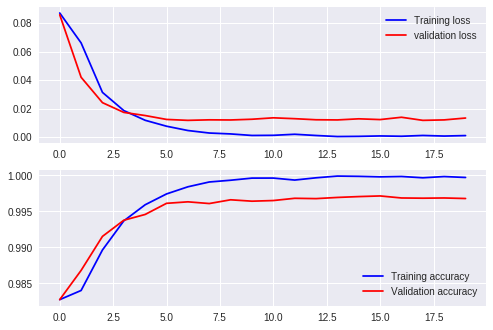

In [21]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [71]:
model1=Sequential()
model1.add(Conv2D(96,3,activation='relu',padding='same',input_shape=(36,36,1)))
model1.add(MaxPool2D((2,2),2))
model1.add(Conv2D(256,3,activation='relu',padding='same'))
model1.add(MaxPool2D((2,2),2))
model1.add(Conv2D(384,5,activation='relu',padding='same'))
model1.add(Conv2D(384,5,activation='relu',padding='same'))
model1.add(Conv2D(256,3,activation='relu',padding='same'))
model1.add(Flatten())
model1.add(Dropout(0.01))
model1.add(Dense(4096,activation='relu'))
model1.add(Dense(4096,activation='relu'))
model1.add(Dense(58,activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 36, 36, 96)        960       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 256)       221440    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 384)         2457984   
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 384)         3686784   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 256)         884992    
__________

In [0]:
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 20, zoom_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2)
datagen.fit(X_train)

In [0]:
reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, mode='auto', min_lr=0.0001)

In [75]:
history1=model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 400),verbose=2,epochs = 20, steps_per_epoch = X_train.shape[0] //400, validation_data = (X_val,Y_val),callbacks=[reduce_lr])

Epoch 1/20
1162/1162 [==============================] - 2s 2ms/sample - loss: 0.0870 - acc: 0.9828
 - 24s - loss: 0.0871 - acc: 0.9828 - val_loss: 0.0870 - val_acc: 0.9828
Epoch 2/20
1162/1162 [==============================] - 1s 457us/sample - loss: 0.0869 - acc: 0.9828
 - 16s - loss: 0.0870 - acc: 0.9828 - val_loss: 0.0869 - val_acc: 0.9828
Epoch 3/20
1162/1162 [==============================] - 1s 459us/sample - loss: 0.0865 - acc: 0.9828
 - 16s - loss: 0.0863 - acc: 0.9828 - val_loss: 0.0865 - val_acc: 0.9828
Epoch 4/20
1162/1162 [==============================] - 1s 472us/sample - loss: 0.0747 - acc: 0.9828
 - 16s - loss: 0.0819 - acc: 0.9828 - val_loss: 0.0746 - val_acc: 0.9828
Epoch 5/20
1162/1162 [==============================] - 1s 482us/sample - loss: 0.0618 - acc: 0.9833
 - 16s - loss: 0.0754 - acc: 0.9828 - val_loss: 0.0617 - val_acc: 0.9833
Epoch 6/20
1162/1162 [==============================] - 1s 470us/sample - loss: 0.0590 - acc: 0.9838
 - 16s - loss: 0.0688 - acc: 0.

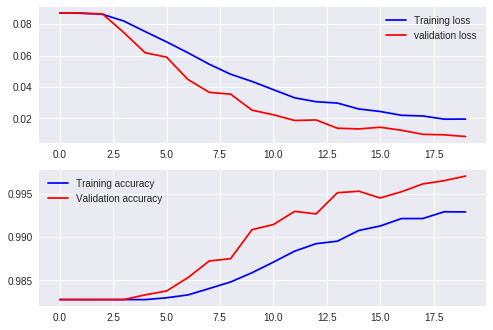

In [76]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history1.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
model.save('model.h5')

In [48]:
model.evaluate(keras.utils.normalize(X_test,axis=1), Y_test, batch_size =400, verbose =1)

1292/1292 [==============================] - 0s 272us/sample - loss: 0.0161 - acc: 0.9963


[0.01608943457689263, 0.9963035]

In [49]:
model.metrics_names

['loss', 'acc']

In [50]:
predicted = model.predict(x = keras.utils.normalize(X_test,axis=1), verbose = 1)

1292/1292 [==============================] - 0s 365us/sample


In [0]:
predicted = np.argmax(predicted, axis = 1)

['a' 'अ']


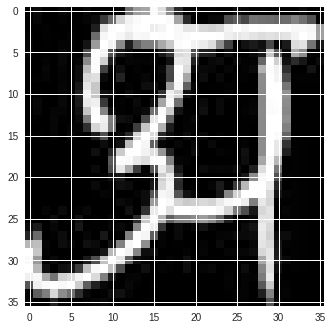

In [53]:
i=1
img = X_test[i].reshape([36,36])
plt.imshow(img)
if(predicted[i]<36):
  print(Y_train_1[predicted[i]])
elif(46>predicted[i]>=36):
  print(Y_train_2[predicted[i]-36])
else:
  print(Y_train_3[predicted[i]-46])

In [0]:
model1.save('model1.h5')

In [78]:
model1.evaluate(keras.utils.normalize(X_test,axis=1), Y_test, batch_size =400, verbose =1)

1292/1292 [==============================] - 1s 884us/sample - loss: 0.0085 - acc: 0.9968


[0.008452028534937385, 0.9968105]

In [79]:
predicted = model1.predict(x = keras.utils.normalize(X_test,axis=1), verbose = 1)

1292/1292 [==============================] - 2s 1ms/sample


In [0]:
predicted=np.argmax(predicted,axis=1)

['cha' 'च']


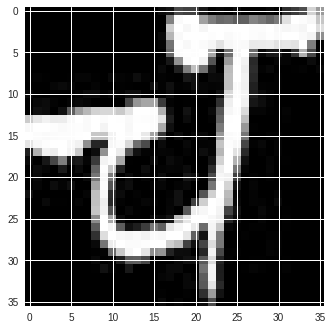

In [81]:
i=4
img = X_test[i].reshape([36,36])
plt.imshow(img)
if(predicted[i]<36):
  print(Y_train_1[predicted[i]])
elif(46>predicted[i]>=36):
  print(Y_train_2[predicted[i]-36])
else:
  print(Y_train_3[predicted[i]-46])